In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
from src.data import Data
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.preprocessing import DataPreprocessor
from src.model import Model
from src.evaluation import Evaluation
from src.genetic_algorithm import GeneticAlgorithm

from sklearn.model_selection import train_test_split

In [ ]:
data = Data()
essays = data.load()

In [ ]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

In [6]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

In [29]:
model = Model()
model.fit(X_train_transformed, y_train)
predictions = model.predict(X_train_transformed)

/Users/victormaricato/Documents/Research/Fiocruz/hepatocytes-crypreservation-solutions/src/model.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Root Mean Squared Error: 5.972191063108911
Mean Absolute Error: 3.744070499899122
R2 Score: 0.9651854777471558


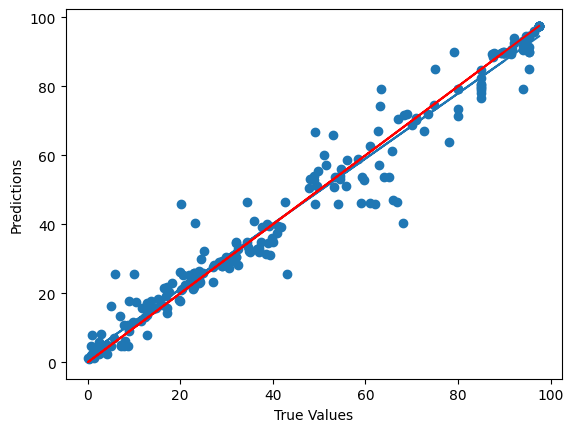

In [34]:
evaluation = Evaluation()
evaluation.report(y_train, predictions)

Root Mean Squared Error: 14.304145929787108
Mean Absolute Error: 10.042630819881625
R2 Score: 0.7772464757749877


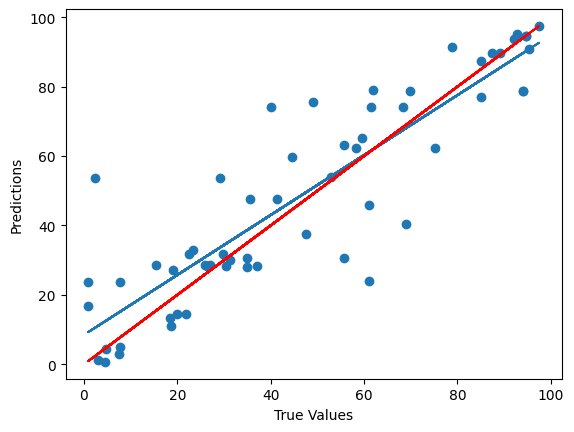

In [33]:
evaluation.report(y_test, model.predict(X_test_transformed))

In [110]:
genetic_algorithm = GeneticAlgorithm(
    X_train_transformed,
    model,
    population_size=10,
    max_generations=10,
)
genetic_algorithm.fit()

(array([4.94269286]),
    SACAROSE  MALTOPENTAOSE  GLICOSE  %_SOLUÇÃO_TOTAL  %_OUTRO_CRIOPROTETOR  \
 0       0.0            0.0      0.0            100.0                   0.0   
 
    %_DMSO  Di-rhamnolipids  %_SFB  RAFFINOSE  LACTOSE  ...  \
 0    15.0              0.0   85.0        0.0      0.0  ...   
 
    OUTRO_CRIOPROTETOR_Maltohexaose  OUTRO_CRIOPROTETOR_Maltopentaose  \
 0                              0.0                               0.0   
 
    OUTRO_CRIOPROTETOR_Maltose  OUTRO_CRIOPROTETOR_Maltotetraose  \
 0                         0.0                               0.0   
 
    OUTRO_CRIOPROTETOR_Maltotriose  OUTRO_CRIOPROTETOR_None  \
 0                             0.0                      1.0   
 
    OUTRO_CRIOPROTETOR_Rafinose  OUTRO_CRIOPROTETOR_Sacarose  \
 0                          0.0                          0.0   
 
    OUTRO_CRIOPROTETOR_Trealose  OUTRO_CRIOPROTETOR_γ-Ciclodextrin  
 0                          0.0                                0.0  
 
 [1 ro

[array([97.48]), array([24.621]), array([24.621]), array([24.621]), array([24.621]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([5.9558]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.94269286]), array([4.942692

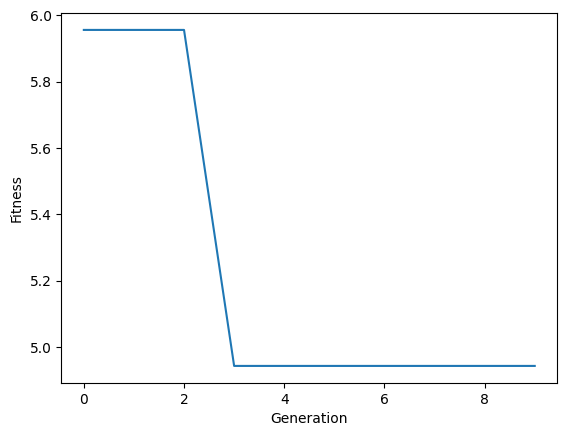

In [111]:
genetic_algorithm.show_history()